In [207]:
# SUJET : Comparaison des vainqueurs d’élections avec différents modes de vote

# par une étude probabiliste à partir de simulations
# de situations de vote - deux méthodes seront proches si elles ont le même vainqueur. C’est cette
# dernière comparaison que nous aimerions mettre en œuvre à partir d’un protocole de simulations.

# à partir des résultats obtenus par simulation, proposer une classification des méthodes par rapport aux
# vainqueurs obtenus pour chaque élection.

# générer les participants et les votes =>

# loi binomiale, loi uniforme, loi Bêta

# Pondorset, méthode de Gaut


# EXEMPLES MÉTHODES VOTES : Scrutin majoritaire à un tour, à deux tours, scrutin proportionnel,
# vote par approbation, scrutin par élimination, vote préférentiel, jugement majoritaire

# les meilleurs méthodes de votes dépendent du contexte et de ce que l'on veut faire
# exemple pour élection un des meilleurs => vote par approbation (simple et efficace)

# Parmi les méthodes de vote par évaluation,
# on peut citer le vote par approbation, le jugement majoritaire ou le vote à la moyenne.

# donc comparer les méthodes de votes entre elles et regarder pour chacune le nombre et le degrès de satisfaction
# des votants


# LIENS UTILES : 
# https://www.lamsade.dauphine.fr/~mayag/Chapter_3_Aggregation_functions_Slides_V2.pdf
# https://github.com/simberaj/votelib
# https://pypi.org/project/condorcet/
# https://monlyceenumerique.fr/formations_python/python_2021/dl/lois_probabilites_simulation.html

# SCIENCE ETONNANTE : https://youtu.be/ZoGH7d51bvc

# les cours de ce mec tout en  haut très utile (MASTER BDMA CentraleSupelec : Decision Modeling) :
# https://www.lamsade.dauphine.fr/~mayag/teaching.html

from platform import python_version
print("python version : ",python_version())

python version :  3.9.12


In [208]:
import math
import numpy as np

# ===== Majorité Absolue =====
def majoriteAbsolue(nbVoix,nbTotalVotant):
    if nbTotalVotant%2 == 0: # pair
        if nbVoix >= ((nbTotalVotant / 2) + 1):
            return True
        else:
            return False
    else: # impair
        # correction exception
        if nbVoix == nbTotalVotant:
            return True
        else:
            if nbVoix >= (nbTotalVotant+1 / 2):
                return True
            else:
                return False
            
            
# ===== Simuler l'opinion politiques des candidats =====
def distanceEuclidienne(coord1,coord2):
    x1,y1 = coord1
    x2,y2 = coord2
    return math.sqrt(pow(x2-x1,2)+pow(y2-y1,2))


# ===== Loi Uniforme =====
def generate_n_uniform_coord(n):
    points = []
    for i in range(0,n):
        points.append([round(np.random.uniform(-1, 1.0),16),round(np.random.uniform(-1, 1.0),16)]) # entre -1 et 1, 16 chiffres après la virgule
    return points


# ===== Loi Normale =====
def normal_distribution(mean, std_dev):
    u1 = random.random()
    u2 = random.random()
    z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    x = mean + z1 * std_dev
    return x

def generate_n_normal_coord(n):
    mean = 0
    std_dev = 0.4
    
    points = []
    count = 0
    
    while count < n:
        x = normal_distribution(mean, std_dev)
        y = normal_distribution(mean, std_dev)

        if abs(x)<=1 and abs(y)<=1: # Mapping the coordinate to the [-1, 1] range
            points.append([x,y])
            count += 1
        
    return points

# ===== Loi Bêta =====
def generate_n_beta_coord(n): 
    alpha, beta = 5, 5 # jouer avec les paramètres
    
    x = 2*np.random.beta(alpha, beta, n) - 1
    y = 2*np.random.beta(alpha, beta, n) - 1
    points = np.column_stack((x,y))
    
    for i in range(0,n): # on rajoute ou enlève un peu => points moins centrés
        offset1 = random.uniform(-0.8,0.8) # plus on augmente la borne, plus c'est dispersé
        offset2 = random.uniform(-0.8,0.8)
        offset_x = (np.random.rand(1)*2-1)*offset1
        offset_y = (np.random.rand(1)*2-1)*offset2
        
        points[i][0] += offset_x
        points[i][1] += offset_y
    
    points = np.clip(points, -1, 1) # pour remettre les points qui sortent du graph
    
    return points.tolist()


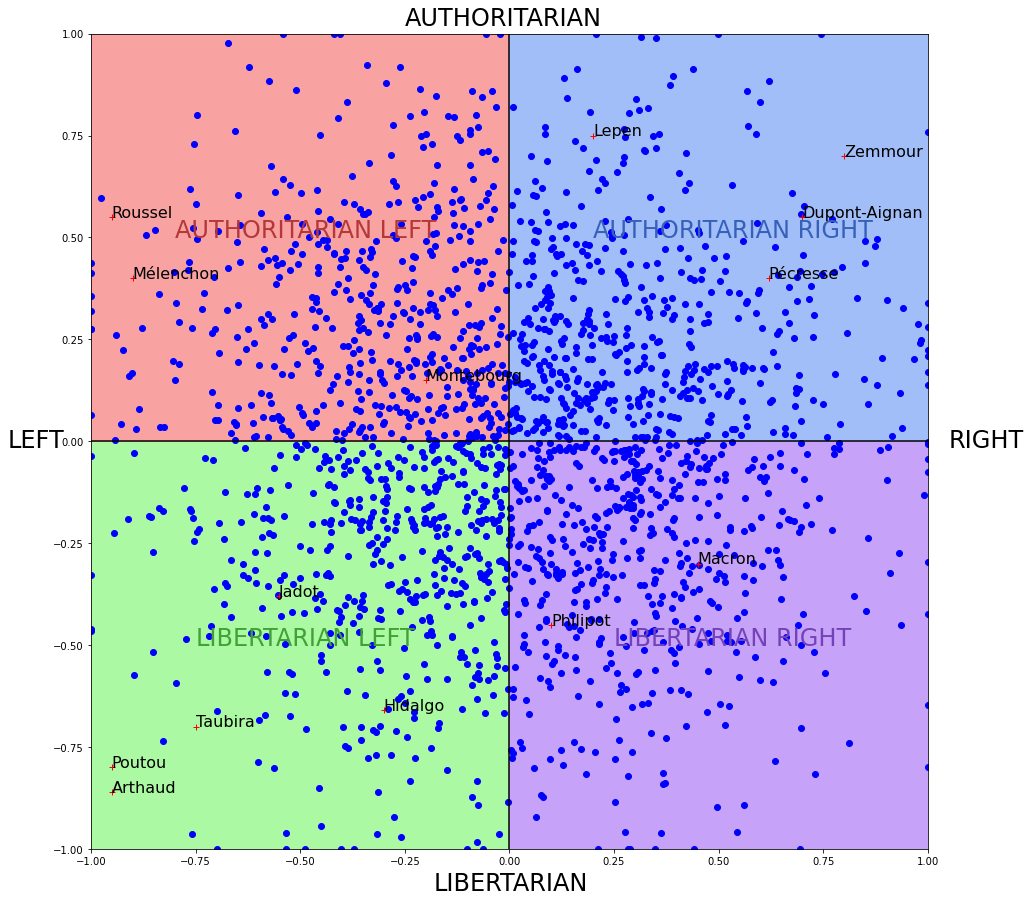

In [209]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import random

# ====== POLITICAL COMPASS ======

# on prends comme exemple un politic compass, et on admets que les votants vont voter a chaque fois pour 
# les candidats qui sont les plus proches de leurs idées politiques (donc de leurs position => distance euclidienne)

# SOURCES : https://www.reddit.com/r/PoliticalCompass/comments/rsdf7t/political_compass_of_the_candidates_of_the_2022/


nombre_votants = 2000 # nb de votes

listeCoord = []

# candidats présidentielle 2022, avec leurs position dans le graphique comme dans la source:
# PLOT YOUR CANDIDATES
dic = {"Macron":[0.45, -0.3],"Montebourg": [-0.20,0.15],"Mélenchon":[-0.90,0.40],"Zemmour":[0.8, 0.7],
       "Dupont-Aignan":[0.7, 0.55],"Pécresse":[0.62, 0.40],"Lepen":[0.2, 0.75],
       "Philipot":[0.1, -0.45],"Roussel":[-0.95,0.55],"Jadot":[-0.55,-0.38],
       "Hidalgo":[-0.3,-0.66],"Taubira":[-0.75,-0.7],
       "Poutou":[-0.95,-0.8],"Arthaud":[-0.95,-0.86]}

# fonction
def drawCompass(dic,listeCoord,nombre_votants):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    
    if listeCoord == []:
        listeCoord = generate_n_beta_coord(nombre_votants)
        
    # PLOT COORDINATES
    for coord in listeCoord:
        plt.plot(coord[0], coord[1], 'bo')

    # LABELS
    plt.text(-0.8, 0.5, "AUTHORITARIAN LEFT", fontsize=24,color='#b43838')
    plt.text(0.2, 0.5, "AUTHORITARIAN RIGHT", fontsize=24,color='#3661b9')
    plt.text(-0.75, -0.5, "LIBERTARIAN LEFT", fontsize=24,color='#40a135')
    plt.text(0.25, -0.5, "LIBERTARIAN RIGHT", fontsize=24,color='#7442b8')
    plt.text(-1.2, -0.015, "LEFT", fontsize=24,color='black')
    plt.text(1.05, -0.015, "RIGHT", fontsize=24,color='black')
    plt.text(-0.25,1.02, "AUTHORITARIAN", fontsize=24,color='black')
    plt.text(-0.18,-1.1, "LIBERTARIAN", fontsize=24,color='black')


    # PLOT CANDIDATES
    for name,coord in dic.items():
        plt.plot(coord[0],coord[1], 'r+')
        plt.text(coord[0],coord[1], name, fontsize=16,color='black')

    # AXES
    plt.axhline(y = 0, color = 'black', linestyle = '-')
    plt.vlines(x = 0, ymin=-1, ymax=1,color = 'black', linestyle = '-')

    # COLORS RECTANGLE
    rect1 = Rectangle((0,0),-1,-1,color ='#abf9a2')
    rect2 = Rectangle((0,0),-1,1,color ='#f9a2a2')
    rect3 = Rectangle((0,0),1,1,color ='#a2bef9')
    rect4 = Rectangle((0,0),1,-1,color ='#c7a2f9')
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)

    plt.xlim([-1,1])
    plt.ylim([-1,1])

    plt.show()
    
drawCompass(dic,listeCoord,nombre_votants)



In [210]:
# LES DIFFÉRENTES MÉTHODES DE VOTES IMPLÉMENTÉES : 

# Vote préférentiel (gagnant déterminé par le principe de Condorcet) => FAIT
# Méthode de vote de Borda => FAIT
# Scrutin majoritaire à un tour => FAIT
# Scrutin majoritaire à deux tours => FAIT
# Vote par approbation => FAIT
# Vote Alternatif (ou vote par élimination successive => FAIT
# Jugement majoritaire (Balinsky) => FAIT
# Vote à la moyenne => FAIT
# Vote de Copeland => FAIT



#Parmi les méthodes de vote par évaluation,
#on peut citer le vote par approbation, le jugement majoritaire ou le vote à la moyenne.


# "Le vote par élimination successive est utilisé pour l'élection présidentielle en Irlande,
# pour l'élection des députés en Australie et, depuis cette année, pour toutes les élections dans
# l'Etat du Maine aux Etats-Unis", selon Sylvain Bouveret, de l'université de Grenoble.


#"Kenneth Arrow, prix Nobel d'économie, a démontré en 1951 que le scrutin parfait n'existait pas, 
#donc on essaye de trouver celui qui reflète le plus possible la préférence des électeurs", 
#conclut Herrade Igersheim. Tout en gardant à l'esprit qu'en la matière "la neutralité n'existe pas".



# On voudrait un système de vote qui satisfasse au moins 2 conditions : 
# - 1 : quand un candidat progresse dans l'opinion, il ne peut que progresser à la fin 
# (mais ce n'est pas le cas pour certaine méthodes comme le scrutin majoritaire classique par ex).
# - 2 : que le résultat final ne soit pas dépendant de l'ajout ou du retrait de candidats mineurs qui
# n'ont aucune chance d'aller au bout.

# or ce n'est pas possible => 
# Théorème d'impossibilité de Kenneth Arrow : il n'existe aucun système électoral qui satisfait ces 2 conditions

# mais le théorème d'impossibilité ne porte que sur les systèmes de votes où ont classe les candidats 
# (or pour l'approbation on ne classe pas les candidats par préférences)

# Problème avec l'approbation on ne peut pas modérer nos préférences entre Très bien et 'Passable'
# alors rentre en jeu le jugement majoritaire : https://youtu.be/ZoGH7d51bvc?t=987
# où chacun est jugé indépendament, donc pas de vote utile, on échappe au paradoxe d'Arrow =>
# quand on progresse dans l'opinion on ne peut pas regresser

In [211]:
# $ pip install condorcet
import condorcet

# VOTE PRÉFÉRENTIEL : =>
# on élu le gagnant avec la méthode de condorcet =>
# Vainqueur de Condorcet = candidat qui gagne tous ses duels fasse a chaque autres candidats

# Le principe de Condorcet favorise les centristes, mais en même temps quand il s'agit de démocratie 
# le principe de majorité invite à chercher le consensus, et le centre représente bien ce consensus

# une méthode de vote est 'bonne' si elle n'élu jamais le perdant de condorcet

def methodeDeCondorcet(dic,listeCoord): # OK
    candidates = []
    for candidate in dic.keys():
        candidates.append(candidate) # nom des candidats
    votes = []
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
           
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        #print(preferencesVotant)
        # On convertit la distance en note de 1 à len(candidats) : (1 => le mieux noté)
        cptCandidat = 1
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat +=1 
        
        votes.append(preferencesVotant)
        
    evaluator = condorcet.CondorcetEvaluator(candidates=candidates, votes=votes)
    # returns a list containing at most the first n winners in order
    # and the rest
    winners, rest_of_table = evaluator.get_n_winners(1)
    if len(winners) == 0:
        #print("Aucun Gagnant")
        return None
    # On considère qu'il n'y a qu'un seul gagnant car les cas où toutes les options se valent sont très très rares
    # (dans notre contexte)
    #print("\n Gagnant du vote préférentiel (par la méthode de Condorcet): ",winners[0],"\n")
    #print("\n reste de la table : ",rest_of_table)
    return winners[0]
    

In [212]:
def approbation(dic,listeCoord): # OK
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        # aller jusqu'a len(dic) n'est pas adapté (personne ne vote comme ça ou très peu)
        if len(dic) <= 2:
            nombreApprobation = int(round(random.uniform(1,2),0)) # entre 1 et 3 approbation par votant si moins de 6 candidats 
        elif len(dic) <= 4:
            nombreApprobation = int(round(random.uniform(1,4),0))
        else:
            nombreApprobation = int(round(random.uniform(1,6),0)) # sinon entre 1 et 6
            
        #nombreApprobation = 4 # 4 approbations max par votant
        
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        #print(tmpDistance)
        lastDic = {}
        # Les approbations sont faites en fonction de la distance avec chaque candidat
        for appro in range(nombreApprobation):
            min_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == min_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = min_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1

    # OK, ici on a nos votes, il faut calculer donc le vainqueur 
    # calculer celui qui a le plus de votes 
    res = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if res.get(k):
                res[k] += 1
            else:
                res[k] = 1
  
    ordre = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    
    if list(ordre.keys())[0] == None:
        return None
    
    gagnant = list(ordre.keys())[0]
    #print("\n Gagnant(s) du vote par approbation: ",gagnant)
    return gagnant
    
#winnerApprobation = approbation(dic)


In [213]:
nbTours = 2

def uninominal(dic,listeCoord,nbTours = 1): # OK
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        nbIteration = 1
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        lastDic = {}
        for appro in range(nbIteration):
            min_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == min_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = min_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1
        
    # Résultats 1er tour :
    resultat1erTour = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if resultat1erTour.get(k):
                resultat1erTour[k] += 1
            else:
                resultat1erTour[k] = 1
                
    premierTour = dict(sorted(resultat1erTour.items(), key=lambda item: item[1],reverse=True))
    #print("résultats 1er tour => \n",premierTour)
     
    
    # Si majoité absolue => pas de 2eme tour
    if majoriteAbsolue(list(premierTour.values())[0],nombre_votants):
        gagnant = list(premierTour.keys())[0]
        nb_voix = list(premierTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        #print("majoité absolue !")
        #print("\n Gagnant du vote uninominal : ",gagnant, " avec ",pourcentage,"%")
        return gagnant 
        
    if nbTours == 2:
        cptVotant = 0
        resVotes = {}
        for coordV in listeCoord:
            tmpDistance = {}
            # prendre les noms et coordonnées des 2 premiers :
            premier = dic.get(list(premierTour.keys())[0])
            if len(list(premierTour.keys())) == 1: # que des votes pour un seul candidat
                return premier
            deuxieme = dic.get(list(premierTour.keys())[1])
            deuxPremiers = {}
            deuxPremiers[list(premierTour.keys())[0]] = premier
            deuxPremiers[list(premierTour.keys())[1]] = deuxieme
            
            for candidat,coordC in deuxPremiers.items():
                tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
            
            lastDic = {}
            for k,v in tmpDistance.items():
                if v==min(tmpDistance.values()):
                    lastDic[k] = v
                    
            resVotes[cptVotant] = lastDic
            cptVotant +=1
        
        # Résultats 2nd tour :
        resultat2emeTour = {}
        for dico in resVotes.values():
            for k,v in dico.items():
                if resultat2emeTour.get(k):
                    resultat2emeTour[k] += 1
                else:
                    resultat2emeTour[k] = 1
        secondTour = dict(sorted(resultat2emeTour.items(), key=lambda item: item[1],reverse=True))
        #print("\n résultats 2eme tour => \n",secondTour)
        gagnant = list(secondTour.keys())[0]
        nb_voix = list(secondTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        #print("\n Gagnant du vote uninominal à 2 tours : ",gagnant, " avec ",pourcentage,"% \n")
        return gagnant
    
    else:
        gagnant = list(premierTour.keys())[0]
        nb_voix = list(premierTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        #print("\n Gagnant du vote  uninominal à 1 tour: ",gagnant, " avec ",pourcentage,"% \n")
        return gagnant

#winnerUninominalUnTour = uninominal(dic,1)
#winnerUninominalDeuxTours = uninominal(dic,listeCoord,nbTours)



In [214]:
# VOTE DE BORDA : (type vote préférentiel) ressemble à condorcet mais dans des rares cas
# elle n'élit pas le vainqueur de condorcet donc elle reste quand même très bien

def methodeDeBorda(dic,listeCoord): # OK
    votes = []
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        # On convertit la distance en note de len(candidats) à 1 : (la + note la plus haute => mieux est le candidat)
        cptCandidat = len(dic)
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat -=1 
        
        votes.append(preferencesVotant)
    
    # Résultats : 
    res = {}
    for dico in votes:
        for k,v in dico.items():
            if res.get(k):
                res[k] += v
            else:
                res[k] = v
                
    res = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    
    if list(res.keys())[0] == None:
        return None
    
    gagnant = list(res.keys())[0]
    return gagnant
    
#winnerBorda = methodeDeBorda(dic)
    

In [215]:
# Vote alternatif (ou vote par élimination successive, ou vote à second tour instantané )
# source = https://youtu.be/ZoGH7d51bvc?t=303

# à chaque tours on enlève le dernier, et on continu jusqu'à ce 
# qu'il reste un seul candidat ou si un candidat à la majorité absolue ( 50 % + 1 ).
# essayer avec et sans majorité Absolue pour voir si ça change !

# Dans sa forme absolue, où l’électeur est obligé de classer tous les candidats

# Vote alternatif = Plus simple => on ne fait qu'un seul tour 

def eliminationsSuccessives(dic,listeCoord): # OK
    votes = []
    
    # calcul des préférences de chacun
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        # On convertit la distance en note de 1 à len(candidats) :
        cptCandidat = 1
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat +=1         
        votes.append(preferencesVotant)
    #print(votes)
    # on touche pas au truc d'en haut, les votants ne votent qu'une seule fois (un seul tour) ! 
    res = {}
    
    candidats_elimines = []
    
    # On élimine les derniers candidats
    while(len(res) != 1):
        for vote in votes:
            for nom,classement in vote.items():
                # on recherche le premier candidat pas éliminé de la liste du votant
                if nom not in candidats_elimines:
                    premier_candidat_pas_elimine = nom
                    # on a trouvé => break
                    break
                else:
                    premier_candidat_pas_elimine = ""
                    
            if premier_candidat_pas_elimine != "":
                if res.get(premier_candidat_pas_elimine):
                    # on est déjà passé sur le candidat
                    res[premier_candidat_pas_elimine] += 1
                else:
                    # il a été mit qu'une seule fois premier pour l'instant
                    res[premier_candidat_pas_elimine] = 1
    
        res = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
        
        if res == {}: # si égalité entre les candidats (si pas bcp de candidat et de votants)
            return None
        
        last_key_res = list(res)[-1]
        candidats_elimines.append(last_key_res)
        res.pop(last_key_res) # on enlève le dernier
        #reset tout les votes pour redistribuer les préférences, sans celui qui a sauté
        if len(res) != 1:
            for k,v in res.items():
                res[k] = 0
        
    # Résultat : 
    gagnant = list(res)[0]
    #print(res,"\n")
    #print("Gagnant par la méthode de vote à éliminations successives = ",gagnant)
    return gagnant

#winnerEliminationsSuccesssives = eliminationsSuccessives(dic)
    

In [216]:
# noter les candidats et retenir celui qui à la note médiane la + élevée
# Le jugement majoritaire élit le candidat dont la médiane des évaluations est la plus élevée

# La méthode de Borda et le jugement majoritaire tendent à élirent le vainqueur de Concorcet
# même si  dans des rares cas elle n'élissent pas le vainqueur de condorcet 
# mais dans les cas pratique et en elles restent quand même très fiable.

# Inconvenients : Ces méthodes contrairement à notre scrutin actuel sont difficile à mettre en place (quoi que...)


mentions = ["A Rejeter","Insuffisant","Passable","Assez Bien","Bien","Très Bien","Excellent"]
mentions_to_note = {"A Rejeter":0,"Insuffisant":1,"Passable":2,"Assez Bien":3,"Bien":4,"Très Bien":5,"Excellent":6}

# distance <= 0.2 : Excellent
#          <= 0.4 : Très Bien 
#          <= 0.8 : Bien
#          <= 1.1 : Assez Bien
#          <= 1.3 : Passable
#          <= 1.4 : Insuffisant
#          > 1.4 : A Rejeter

distance_to_mention = {0.2 : mentions[6],0.4:mentions[5],0.8:mentions[4],1.1:mentions[3],1.3:mentions[2],1.4:mentions[1],1.5:mentions[0]}

last_borne = list(distance_to_mention.keys())[-1]

# https://youtu.be/ZoGH7d51bvc?t=987

# https://youtu.be/ZZb4TjvupkI?t=641

# Par Balinsky

def jugementMajoritaire(dic,listeCoord):
    votes = []
    # calcul des préférences de chacun
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        for candidat,distance in preferencesVotant.items():
            for k,v in distance_to_mention.items():
                if k != last_borne:
                    if distance <= k:
                        preferencesVotant[candidat] = v
                        break
        
                else:
                    # le candidat est forcément en "A Rejeter"
                    preferencesVotant[candidat] = v
        votes.append(preferencesVotant)
        
    resCandidats = {}

    for vote in votes:
        for candidat, appreciation in vote.items():
            if candidat not in resCandidats:
                # on créer le candidat dans le dico résultat
                resCandidats[candidat] = {}
                for mention in mentions:
                    # on initialise toutes ses mentions à 0 
                    resCandidats[candidat][mention] = 0
            
            resCandidats[candidat][appreciation] +=1
        
    # Résultats : 
    allMediane = []
    if nombre_votants % 2 == 0:
        indice_mediane = (len(listeCoord)) / 2
    else:
        indice_mediane = (len(listeCoord)+1) / 2 
    
    for nomCandidat,dicAppreciations in resCandidats.items():
        cpt_mediane = 0
        fini = False
        for appreciation,nombre in dicAppreciations.items():
            if fini:
                break
            for i in range(nombre):
                if indice_mediane == cpt_mediane:
                    votes_pour_mention_inf = cpt_mediane-i
                    if votes_pour_mention_inf < 0: # si il est dans à rejeter
                        votes_pour_mention_inf = 0
                    allMediane.append({nomCandidat:appreciation,"votes_pour_des_mentions_inf":votes_pour_mention_inf,"note":mentions_to_note[appreciation]})
                    fini = True
                    break
                cpt_mediane+=1
    
    tmpMax = 0
    listeMeilleurs = []
    mentionMajoritaire = ""
    # On garde le ou les candidats ayant la meilleure mention : 
    for dics in allMediane:
        for k,v in dics.items():
            if k=="note" and v > tmpMax:
                tmpMax = v # = mention majoritaire
                mentionMajoritaire = mentions[v]
                listeMeilleurs = [] # on récréer la liste
                listeMeilleurs.append(list(dics.keys())[0])
                
            elif k=="note" and v==tmpMax:
                listeMeilleurs.append(list(dics.keys())[0])
    #print("\n")
    
    # Si un seul candidat a la meilleure mention il gagne directement
    if len(listeMeilleurs) == 1:
        meilleur = listeMeilleurs[0]
        #print(meilleur, " gagne le jugement majoritaire avec la mention ",mentionMajoritaire,"\n")
        return meilleur
    else:
        # sinon les départager avec celui qui a moins de pourcentage de votes pour des mentions inférieures
        tmpMin = 9999999999999999
        meilleur = ""
        #print(allMediane)
        for dics in allMediane:
            #print(dics,"\n")
            for candidat,v in dics.items():
                if candidat in listeMeilleurs:
                    nb_mention_inf = list(dics.values())[1]
                    if nb_mention_inf < tmpMin:
                        tmpMin = nb_mention_inf
                        meilleur = candidat
        #print(meilleur, " gagne le jugement majoritaire avec mention ",mentionMajoritaire," et seulement ",tmpMin," nombre de mentions inférieur à ",mentionMajoritaire,"\n")
        if meilleur == "":
            return None
        else:
            return meilleur

#winnerJM = jugementMajoritaire(dic,listeCoord)
    

In [217]:
# voir page 97 du livre "comment être élu à tout les coups"

# Le vote à la moyenne élit le candidat dont la moyenne des évaluations
# est la plus élevée

# En statistique, la moyenne est dite « peu robuste » aux éléments extrêmes

# Convertir la distance en note de 0 à 10

# distance :
#          <= 0.05 : 10 / 10
#          <= 0.1 : 9
#          <= 0.2 : 8
#          <= 0.4 : 7 
#          <= 0.7 : 6
#          <= 1.1 : 5
#          <= 1.3 : 4
#          <= 1.4 : 3
#          <= 1.5 : 2
#          <= 1.6 : 1
#          > 1.6 : 0

notes = [0,1,2,3,4,5,6,7,8,9,10]
distance_to_note = {0.05 : notes[10],0.1:notes[9],0.2:notes[8],0.4:notes[7],0.7:notes[6],1.1:notes[5],1.3:notes[4],1.4:notes[3],1.5:notes[2],1.6:notes[1],1.7:notes[0]}
last_note = list(distance_to_note.keys())[-1]

def vote_a_la_moyenne(dic,listeCoord):
    votes = []
    # calcul des préférences de chacun
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        for candidat,distance in preferencesVotant.items():
            for k,v in distance_to_note.items():
                if k != last_note:
                    if distance <= k:
                        preferencesVotant[candidat] = v
                        break
        
                else:
                    # note de 0
                    preferencesVotant[candidat] = v
        votes.append(preferencesVotant)
        
    allRes = {}
    for vote in votes:
        for c,note in vote.items():
            if c in allRes:
                allRes[c] += note
            else:
                allRes[c] = note
                
    for c,total in allRes.items():
        allRes[c] = total/len(listeCoord)
        
    sortedRes = dict(sorted(allRes.items(), key=lambda item: item[1],reverse=True))
    
    if list(sortedRes.keys())[0] == None:
        return None
    
    gagnant = list(sortedRes.keys())[0]
    
    return gagnant 
        

In [218]:
# compter le nombre de duels que chaque candidat gagne
# celui qui en gagne le plus est le grand vainqueur

def vote_de_Copeland(dic,listeCoord):
    votes = []
    # calcul des préférences de chacun
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        votes.append(preferencesVotant)
    allRes = {}
    for vote in votes:
        cpt = 1
        for candidat,distance in vote.items():
            if candidat not in allRes:
                allRes[candidat] = 0 # initialisation :  à 0 duels gagnés
            
            allRes[candidat] += len(dic) - cpt # le nombre de duels que le candidat gagne parmit les préférences d'un votant
    
            cpt += 1
    
    # le candidat avec la plus grande somme gagne
    gagnant = max(allRes,key = allRes.get)
    return gagnant
    

In [219]:
# On ne récréer pas la liste de coordonnées à chaque fois, pour loi uniforme
listNbVoters = [10,50,100,500,1000,10000]

dic = {"Macron":[0.45, -0.3],"Montebourg": [-0.20,0.15],"Mélenchon":[-0.90,0.40],"Zemmour":[0.8, 0.7],
       "Dupont-Aignan":[0.7, 0.55],"Pécresse":[0.62, 0.40],"Lepen":[0.2, 0.75],
       "Philipot":[0.1, -0.45],"Roussel":[-0.95,0.55],"Jadot":[-0.55,-0.38],
       "Hidalgo":[-0.3,-0.66],"Taubira":[-0.75,-0.7],
       "Poutou":[-0.95,-0.8],"Arthaud":[-0.95,-0.86]}


shuffle = list(dic.items())

np.random.shuffle(shuffle)
dic = dict(shuffle)
print(dic)

def choose_distribution(loi):
    generatedCoord = {}
    if loi == "beta":
        for nombre_votants in listNbVoters:
            coordPartiel = generate_n_beta_coord(nombre_votants)
            generatedCoord[nombre_votants] = coordPartiel
    elif loi == "normal":
        for nombre_votants in listNbVoters:
            coordPartiel = generate_n_normal_coord(nombre_votants)
            generatedCoord[nombre_votants] = coordPartiel
    else:
        coordPartiel = generate_n_uniform_coord(max(listNbVoters)) # on génére le max, puis on va ajouter au fûr et a messure, pour que les points du début reste à la même place....
        last_nb_votants = 0
        for nombre_votants in listNbVoters:
            generatedCoord[nombre_votants] = coordPartiel[0:nombre_votants][:]
            last_nb_votants = nombre_votants
    return generatedCoord


listeNomMethodes = ["Condorcet","Uninominal 1 tour","Uninominal 2 tours","Approbation","Borda",
                    "Éliminations successives","Jugement Majoritaire","Vote à la moyenne","Vote de Copeland"]

listMethods = [methodeDeCondorcet,uninominal,uninominal,approbation,methodeDeBorda,eliminationsSuccessives,
               jugementMajoritaire,vote_a_la_moyenne,vote_de_Copeland]

listNbCandidates = [2,4,6,8,10,12,14]


# ======== Boucle calculs vainqueurs ========

    
def create_DataFrame(distribution):
    
    dicGeneratedCoord = choose_distribution(distribution)
    
    data = []
    cpt = 0
    
    for method in listMethods:
        listeData = []
        for nb_candidat in listNbCandidates:
            dicoCandidat = {k: dic[k] for k in list(dic)[:nb_candidat]}   

            for nombre_votants in listNbVoters:

                listeCoord = dicGeneratedCoord[nombre_votants] 

                # Calculer le résultat de chaque méthode
                if cpt == 2:
                    res = method(dicoCandidat,listeCoord,2) # pour uninominal 2 tours
                else:
                    res = method(dicoCandidat,listeCoord) 

                listeData.append(res)

        cpt += 1 
        data.append(listeData)
    return data


{'Hidalgo': [-0.3, -0.66], 'Macron': [0.45, -0.3], 'Roussel': [-0.95, 0.55], 'Montebourg': [-0.2, 0.15], 'Philipot': [0.1, -0.45], 'Pécresse': [0.62, 0.4], 'Arthaud': [-0.95, -0.86], 'Lepen': [0.2, 0.75], 'Mélenchon': [-0.9, 0.4], 'Taubira': [-0.75, -0.7], 'Dupont-Aignan': [0.7, 0.55], 'Zemmour': [0.8, 0.7], 'Jadot': [-0.55, -0.38], 'Poutou': [-0.95, -0.8]}


In [220]:
import pandas as pd

data_uniform = create_DataFrame("uniform")

# ======== Résultats avec distribution Uniforme ========

df_uniform = pd.DataFrame(data_uniform,index = pd.Index(listeNomMethodes, name = 'Methods'),
                  columns = pd.MultiIndex.from_product([listNbCandidates,listNbVoters],
                                                     names=['nCandidates:', 'nVoters:']))


df_uniform.to_excel("output_results/uniform/uniform_results.xlsx")  
df_uniform.to_csv("output_results/uniform/uniform_results.csv",index=False) 

df_uniform.style

In [221]:
data_normal = create_DataFrame("normal")

# ======== Résultats avec distribution Normale ========

df_normal = pd.DataFrame(data_normal,index = pd.Index(listeNomMethodes, name = 'Methods'),
                  columns = pd.MultiIndex.from_product([listNbCandidates,listNbVoters],
                                                     names=['nCandidates:', 'nVoters:']))

df_normal.to_excel("output_results/normal/normal_results.xlsx")  
df_normal.to_csv("output_results/normal/normal_results.csv",index=False) 

df_normal.style

In [222]:
data_beta = create_DataFrame("beta")


# ======== Résultats avec distribution Bêta ========

df_beta = pd.DataFrame(data_beta,index = pd.Index(listeNomMethodes, name = 'Methods'),
                  columns = pd.MultiIndex.from_product([listNbCandidates,listNbVoters],
                                                     names=['nCandidates:', 'nVoters:']))

 
    
df_beta.to_excel("output_results/beta/beta_results.xlsx")  
df_beta.to_csv("output_results/beta/beta_results.csv",index=False)

df_beta.style